##  Project Title: Glass Identification using Machine Learning

### Project Objective
The objective of this project is to build and evaluate machine learning classification models.
To identify different types of glass based on their chemical composition.
The project demonstrates data exploration, preprocessing, feature engineering,
model training, evaluation, and interpretation using real-world forensic data.

## Dataset
The dataset used is the Glass Identification Data Set. It contains 214 instances with 9 attributes (RI, Na, Mg, Al, Si, K, Ca, Ba, Fe) and one class attribute (Type of glass).

**Attributes:**
1. `RI`: Refractive Index
2. `Na`: Sodium
3. `Mg`: Magnesium
4. `Al`: Aluminum
5. `Si`: Silicon
6. `K`: Potassium
7. `Ca`: Calcium
8. `Ba`: Barium
9. `Fe`: Iron
10. `Type_of_glass`: Class label (1-7)

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
import xgboost as xgb


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the Dataset

In [2]:
df = pd.read_csv("glass_identification.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
df['Type_of_glass'] = df['Type_of_glass'].astype('category')

In [6]:
df['Type_of_glass'].unique()

[1, 2, 3, 5, 6, 7]
Categories (6, int64): [1, 2, 3, 5, 6, 7]

In [7]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [8]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass'], dtype='object')

In [9]:
# Class Distribution
df['Type_of_glass'].value_counts()

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

## Step 3: Exploratory Data Analysis (EDA)

In [10]:
# Check dataset info to see types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   RI             214 non-null    float64 
 1   Na             214 non-null    float64 
 2   Mg             214 non-null    float64 
 3   Al             214 non-null    float64 
 4   Si             214 non-null    float64 
 5   K              214 non-null    float64 
 6   Ca             214 non-null    float64 
 7   Ba             214 non-null    float64 
 8   Fe             214 non-null    float64 
 9   Type_of_glass  214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [11]:
# Summary statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


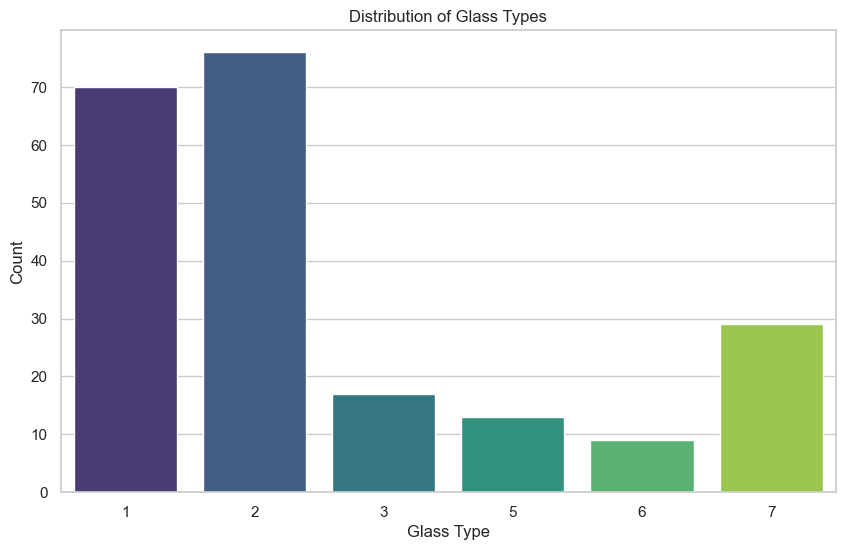

In [12]:
# distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_glass', data=df, palette='viridis')
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

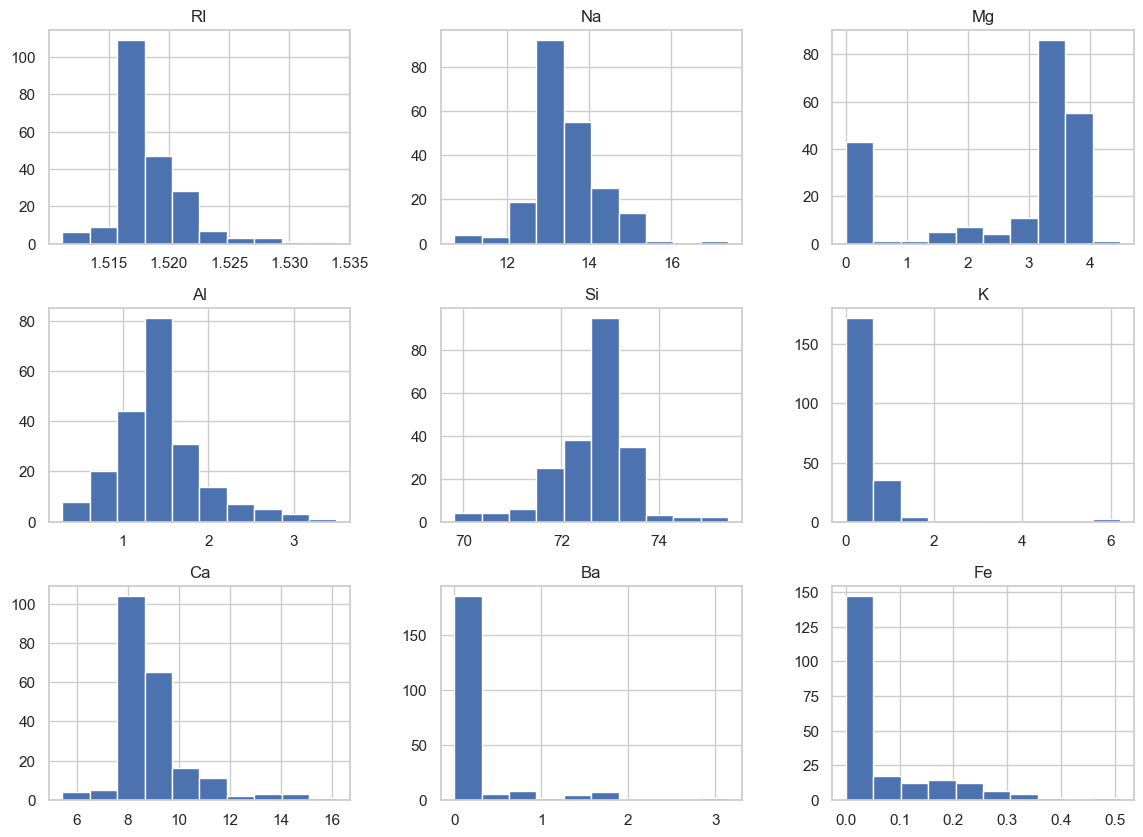

In [13]:
df.drop(columns=['Type_of_glass'],errors='ignore').hist(figsize=(14,10))
plt.show()

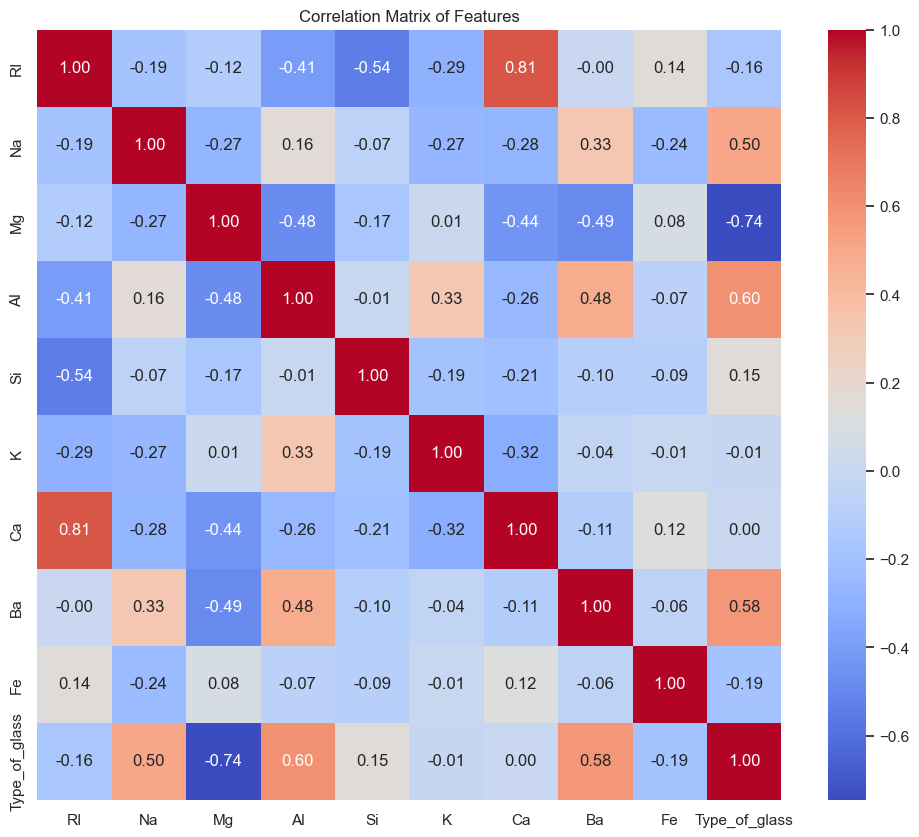

In [14]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

```
Some features like RI, Na, Ca, Ba show strong variation.
Correlated features may influence model performance.
```

## Step 4: Data Preprocessing

In [15]:
# Separate Features and Target
X = df.drop('Type_of_glass', axis=1)
y = df['Type_of_glass']

# XGBoost expects classes to start from 0. The dataset has classes 1-7.
# We will use LabelEncoder to transform them to 0-6 range.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Original Classes:", np.unique(y))
print("Encoded Classes:", np.unique(y_encoded))

Original Classes: [1 2 3 5 6 7]
Encoded Classes: [0 1 2 3 4 5]


### Train-Test Split

In [16]:
# Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (171, 9)
Testing shape: (43, 9)


In [17]:
df['Type_of_glass'].unique()

[1, 2, 3, 5, 6, 7]
Categories (6, int64): [1, 2, 3, 5, 6, 7]

### Feature Scaling

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Handle class Imbalance (SMOTE)

In [19]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

## Step 5: Model Development

###  Model 1: Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train_res, y_train_res)

rf_best = rf_grid.best_estimator_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


### Model 2: XGBoost

In [21]:
# Initialize XGBoost Classifier
from xgboost import XGBClassifier

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob', 
    num_class=len(np.unique(y_encoded)), 
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6, ...)

### Model 3: Logistic Regression

In [22]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

### Model 4: Support Vector Machine

In [23]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_res, y_train_res)

SVC(probability=True)

## Step 6:Model Evaluation

### Evaluation Function

In [24]:
def evaluate_model(model, X_test, y_test,model_name):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [25]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Decode predictions back to original labels if needed, or just compare with y_test (which is encoded)
# Let's inverse transform to show original labels in reports
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

# Calculate Accuracy
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7674


### Evaluate All Models

In [26]:
evaluate_model(rf_best,X_test_scaled, y_test, "Random Forest")
evaluate_model(xgb_model,X_test, y_test, "XGBoost")
evaluate_model(lr, X_test_scaled, y_test, "Logistic Regression")
evaluate_model(svm,X_test_scaled, y_test, "SVM")

Accuracy: 0.7906976744186046
Precision (macro): 0.7994852369852369
Recall (macro): 0.8801587301587301
F1-score (macro): 0.8067099567099567

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.85      0.73      0.79        15
           2       0.38      1.00      0.55         3
           3       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.80      0.88      0.81        43
weighted avg       0.86      0.79      0.81        43

Accuracy: 0.7674418604651163
Precision (macro): 0.7464896214896215
Recall (macro): 0.8412698412698413
F1-score (macro): 0.783652150318817

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.

### Confusion Matrix

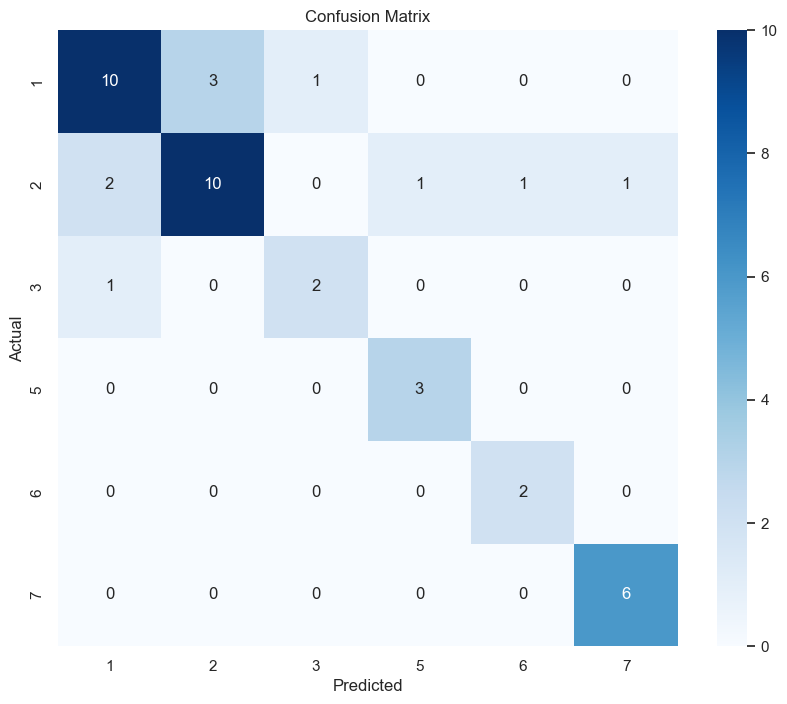

In [27]:
# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_original, y_pred_original)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Step 7: Feature Importance & Insights

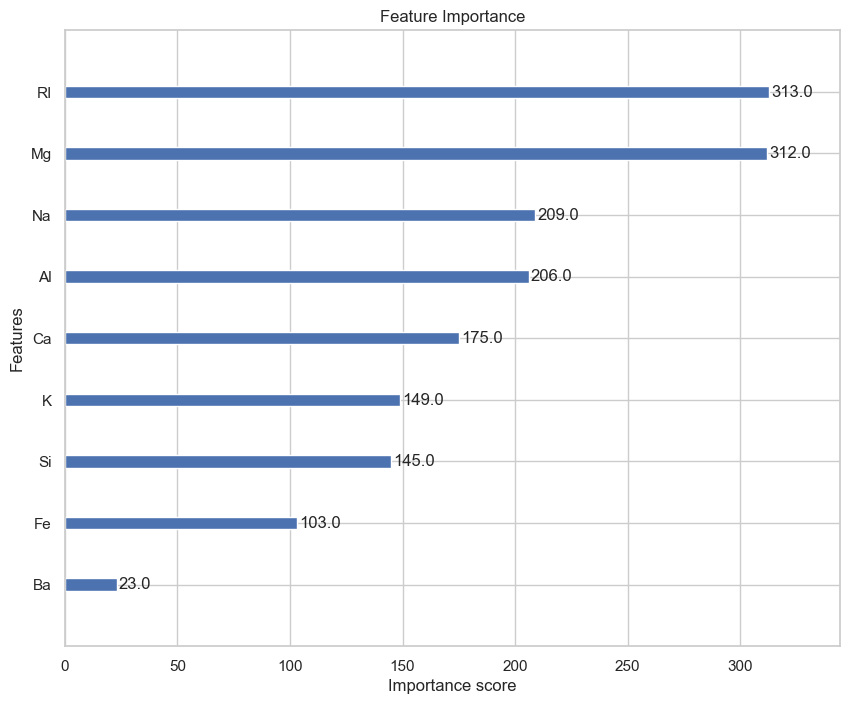

In [28]:
# Feature Importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, ax=plt.gca())
plt.title('Feature Importance')
plt.show()

## Step 8: Cross-Validation

In [29]:
cv_scores = cross_val_score(rf_best, X_train_res, y_train_res, cv=5)
print("CV Mean Accuracy:", cv_scores.mean())

CV Mean Accuracy: 0.8935579415031469


## Step 9: Save Results

In [30]:
import joblib
joblib.dump(rf_best, "glass_rf_model.pkl")

['glass_rf_model.pkl']